# <font color = blue> Lead Scoring Case Study </font>

<div class="alert alert-block alert-info">
<h1><b> Importing the required libraries</b></h1>
</div>

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

<div class="alert alert-block alert-info">
<h1><b> Loading Dataset</b></h1>
</div>

In [3]:
# Importing dataset
pd.set_option("display.max_columns",50)
Leads = pd.read_csv("Leads.csv")
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


<div class="alert alert-block alert-info">
<h1><b> Dataframe Inspection</b></h1>
</div>

In [4]:
# Check duplicates
Leads.duplicated().any()

False

In [5]:
# Dimensions of the dataframe
Leads.shape

(9240, 37)

In [6]:
# Data Type of each column
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Statistical aspects of the dataframe
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# percentage of null values

Leads.isnull().sum()*100/Leads.shape[0]

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

<div class="alert alert-block alert-info">
<h1><b> Data Cleaning</b></h1>
</div>

In [9]:
# Convert categorical variables which have a level called "Select" as null because the leads have not selected anything.

col = ["Specialization","How did you hear about X Education","Lead Profile","City"]
for i in col:
    Leads.loc[Leads[i]=="Select", i] = np.nan
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
# Check the null value percentage
Leads.isnull().sum()*100/Leads.shape[0]

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [11]:
# dropping columns with null values more than 40%

Leads1 = Leads.drop(Leads.columns[Leads.isnull().sum()*100/Leads.shape[0]>40],axis=1)
Leads1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [12]:
# We will drop "Prospect ID", as these are not important for analysis.
Leads1.drop(["Prospect ID"],axis=1,inplace=True)
Leads1.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [13]:
# Check the shape of the dataframe
Leads1.shape

(9240, 29)

In [14]:
# Check for null values percentage
Leads1.isnull().sum()*100/Leads1.shape[0]

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [15]:
# We will also drop 'Tags', 'Last Activity' and 'Last Notable Activity', as these are generated by sales team.
Leads1.drop(['Tags', 'Last Activity', 'Last Notable Activity'],axis=1,inplace=True)
Leads1.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No


### Null values imputation

In [16]:
# value counts for "Lead Source"
Leads1["Lead Source"].value_counts(dropna=False, normalize=True)*100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Live Chat             0.021645
Press_Release         0.021645
Social Media          0.021645
youtubechannel        0.010823
testone               0.010823
NC_EDM                0.010823
blog                  0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
Pay per Click Ads     0.010823
Name: Lead Source, dtype: float64

In [17]:
# Replace missing values with mode, , 
Leads1["Lead Source"].fillna(Leads1["Lead Source"].mode()[0],inplace=True)

# change "google" to "Google"
Leads1["Lead Source"].replace("google","Google",inplace=True)

# convert "Facebook" to "Social Media" and club all small Lead Source
Leads1["Lead Source"].replace("Facebook","Social Media",inplace=True)
Leads1["Lead Source"].replace(['Welingak Website','Referral Sites','Facebook','bing','Click2call','Press_Release',
                               'Live Chat','Social Media','Pay per Click Ads','youtubechannel','WeLearn','NC_EDM',
                               'welearnblog_Home','blog','testone'],"Others",inplace=True)
Leads1["Lead Source"].value_counts(dropna=False)

Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Others             345
Name: Lead Source, dtype: int64

In [18]:
# As there is 1.48% of missing values in 'TotalVisits', we can impute it with median.

Leads1["TotalVisits"].fillna(Leads1["TotalVisits"].median(),inplace=True)
Leads1["TotalVisits"].isnull().sum()

0

In [19]:
# As there is 1.48% of missing values in 'Page Views Per Visit', we can impute it with median.

Leads1["Page Views Per Visit"].fillna(Leads1["Page Views Per Visit"].median(),inplace=True)
Leads1["Page Views Per Visit"].isnull().sum()

0

In [20]:
# value counts for "Country"
Leads1["Country"].value_counts(normalize=True,dropna=False)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
France                   0.064935
Oman                     0.064935
unknown                  0.054113
Kuwait                   0.043290
Nigeria                  0.043290
Germany                  0.043290
South Africa             0.043290
Canada                   0.043290
Sweden                   0.032468
Netherlands              0.021645
Philippines              0.021645
Belgium                  0.021645
Italy                    0.021645
Bangladesh               0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
China                    0.021645
Ghana                    0.021645
Denmark       

**Inference:** 70% of the customers are from India and around 27% of customers have not filled this field. So, we can drop this column as it is skewed.

In [21]:
# Drop "Country" column
Leads1.drop("Country",axis=1,inplace=True)

In [22]:
# Value counts for "City"
Leads1["City"].value_counts(normalize=True,dropna=False)*100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

**Inference:** 40% of the data is missing and around 35% of customers are from Mumbai. So, we can drop this column as it is skewed.

In [23]:
# Drop "City" column
Leads1.drop("City",axis=1,inplace=True)

In [24]:
# Value counts for "Specialization"
Leads1["Specialization"].value_counts(normalize=True,dropna=False)*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [25]:
# We can impute missing values with "Not Specified" as customer has not filled this field.
Leads1["Specialization"].fillna("Not Specified",inplace=True)

# Merge the lowest percentage categories to Other Specializations
Leads1['Specialization'].replace(['International Business','Healthcare Management','Hospitality Management','E-COMMERCE',
                                  'Retail Management','Rural and Agribusiness','E-Business','Services Excellence'],
                                 'Other Specializations',inplace=True)
Leads1["Specialization"].value_counts(normalize=True,dropna=False)*100

Not Specified                        36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Other Specializations                 9.015152
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
Name: Specialization, dtype: float64

In [26]:
# Value counts for Current Occupation
Leads1["What is your current occupation"].value_counts(normalize=True,dropna=False)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [27]:
# We can replace missing values with "No Information".
Leads1['What is your current occupation'].replace(np.nan,'Unknown',inplace=True)

# Merge the lowest percentage categories to Others
Leads1['What is your current occupation'].replace(['Other','Housewife','Businessman'],'Others',inplace=True)
Leads1["What is your current occupation"].value_counts(normalize=True,dropna=False)*100

Unemployed              60.606061
Unknown                 29.112554
Working Professional     7.640693
Student                  2.272727
Others                   0.367965
Name: What is your current occupation, dtype: float64

In [28]:
# Value counts for "What matters most to you in choosing a course"
Leads1["What matters most to you in choosing a course"].value_counts(normalize=True,dropna=False)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

**Inference:** 71 % customers are for "Better Career Prospects" and 29% of customers have not filled this field. So, we can remove this column due to skewness.

In [29]:
# Drop "What matters most to you in choosing a course" column
Leads1.drop("What matters most to you in choosing a course",axis=1,inplace=True)

In [30]:
# Check the Null value percentage
Leads1.isnull().sum()*100/Leads1.shape[0]

Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

In [31]:
# Assess the shape of the data set after cleaning
Leads1.shape

(9240, 23)

<div class="alert alert-block alert-info">
<h1><b> Data Analysis </b></h1>
</div>

## Analysis of categorical variable

#### What is your current occupation

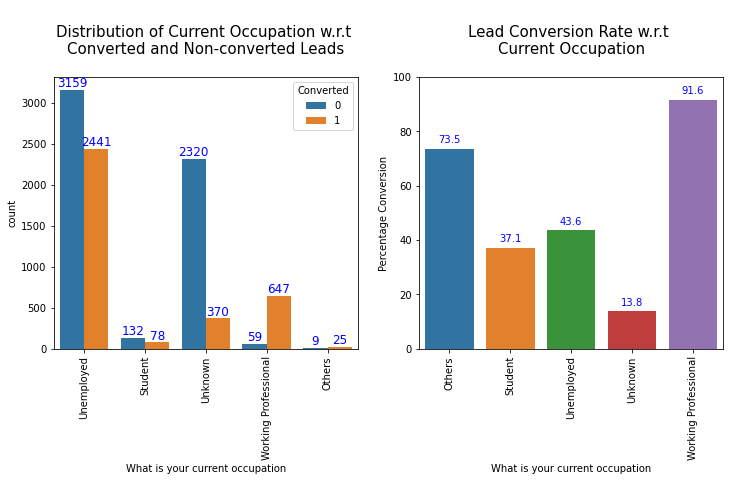

In [32]:
# Plot the value count for 'What is your current occupation'
plt.figure(figsize=(12,5))
plt.subplot(121)
ax = sns.countplot(Leads1["What is your current occupation"],hue=Leads1["Converted"])
plt.xticks(rotation=90)

for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    plt.title("\nDistribution of Current Occupation w.r.t \nConverted and Non-converted Leads\n", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})

# Calculate the conversion rate of each category
df = Leads1.groupby(["What is your current occupation"])['Converted'].apply(lambda p: p.count())
df = pd.DataFrame(df)
df.rename(columns={ 'Converted':"Total"},inplace = True)
df["Converted"] = Leads1.groupby(["What is your current occupation"])['Converted'].sum()
df["Percentage Conversion"] = df["Converted"]*100/df["Total"]

# Plot the conversion rate of each category
plt.subplot(122)
ax=sns.barplot(df.index,df["Percentage Conversion"])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points', color='blue')
    plt.xticks(rotation=90)
    plt.title("\nLead Conversion Rate w.r.t \nCurrent Occupation\n", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)
plt.show()

- **Inference 1**: *Highest number of Leads are from the Unemployed Category*
- **Inference 2**: *Working Professionals have high conversion rate compared other Occupations*
- **Inference 3**: *Leads that do not provide their current Occupation details demonstrate least conversion rate.*

#### Lead Origin

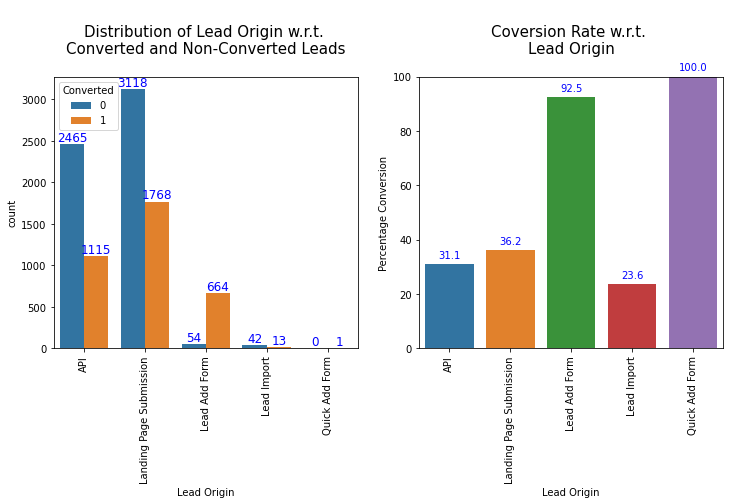

In [33]:
# Plot the value count for 'Lead Origin'
plt.figure(figsize=(12,5))
plt.subplot(121)
ax = sns.countplot(Leads1["Lead Origin"],hue=Leads1["Converted"])
plt.xticks(rotation=90)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    plt.title("\nDistribution of Lead Origin w.r.t. \nConverted and Non-Converted Leads\n", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})

# Calculate the conversion rate of each category
df = Leads1.groupby(["Lead Origin"])['Converted'].apply(lambda p: p.count())
df = pd.DataFrame(df)
df.rename(columns={ 'Converted':"Total"},inplace = True)
df["Converted"] = Leads1.groupby(["Lead Origin"])['Converted'].sum()
df["Percentage Conversion"] = df["Converted"]*100/df["Total"]

# Plot the conversion rate of each category
plt.subplot(122)
ax=sns.barplot(df.index,df["Percentage Conversion"])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points', color='blue')
    plt.xticks(rotation=90)
    plt.title("\nCoversion Rate w.r.t. \nLead Origin\n", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)

plt.show()

- **Inference 1**: *Majority of the leads are originating from the Landing Page Submission*
- **Inference 2**: *Least number of leads originated from Quick Add Form*
- **Inference 3**: *Leads originated from Lead Add Form demonstrate high conversion rate compared to every other Lead Origin.*

#### Lead Source

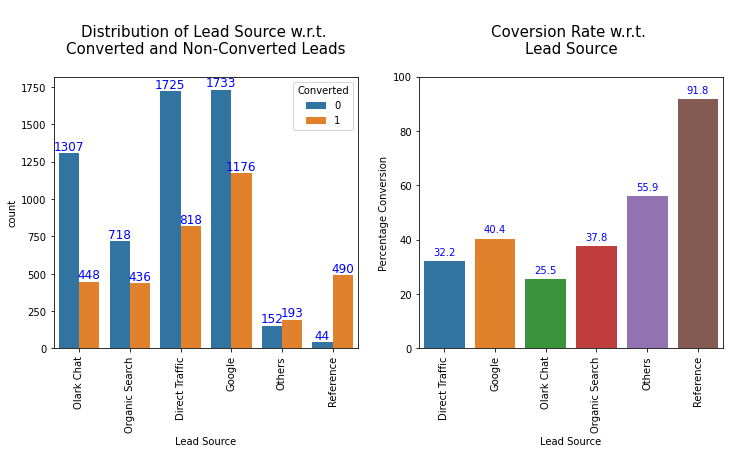

In [34]:
# Plot the distribution of each category 
plt.figure(figsize=(12,5))
plt.subplot(121)
ax = sns.countplot(Leads1["Lead Source"],hue=Leads1["Converted"])
plt.xticks(rotation=90)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    plt.title("\nDistribution of Lead Source w.r.t. \nConverted and Non-Converted Leads\n", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})

# Calculate the conversion rate of each category
df = Leads1.groupby(["Lead Source"])['Converted'].apply(lambda p: p.count())
df = pd.DataFrame(df)
df.rename(columns={ 'Converted':"Total"},inplace = True)
df["Converted"] = Leads1.groupby(["Lead Source"])['Converted'].sum()
df["Percentage Conversion"] = df["Converted"]*100/df["Total"]

# plot the conversion rate of each category
plt.subplot(122)
ax=sns.barplot(df.index,df["Percentage Conversion"])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points', color='blue')
    plt.xticks(rotation=90)
    plt.title("\nCoversion Rate w.r.t. \nLead Source\n", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)
plt.show()

- **Inference 1**: *Google and Direct Traffic are the major lead sources*
- **Inference 2**: *Although not the major Lead source, the conversion rate of Leads originating from Reference category looks quite promising*
- **Inference 3**: *Leads originating from Olark Chat shows very minimal conversion rate compared to other sources.*

#### Specialization

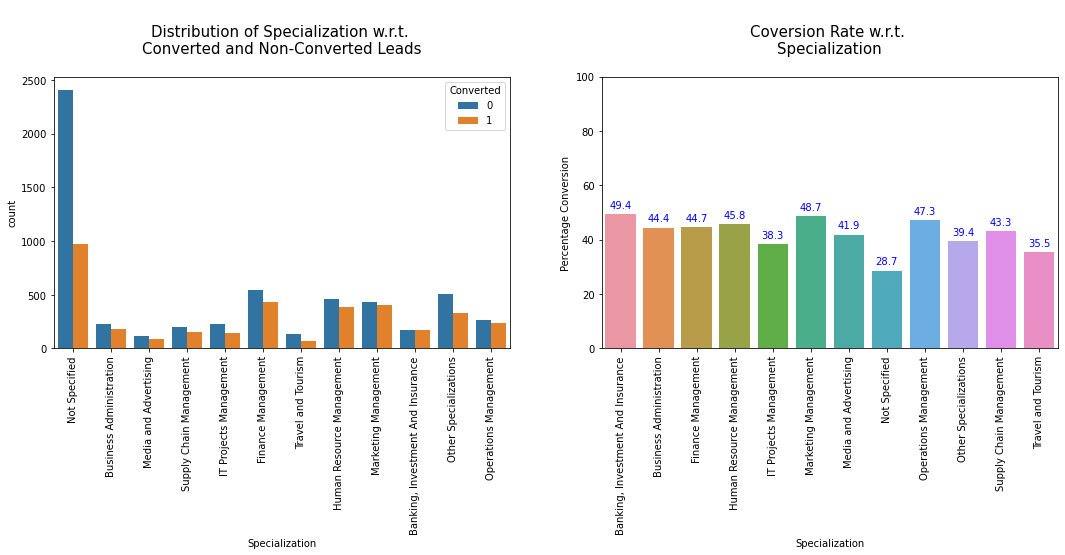

In [35]:
# Plot the distribution of each category
plt.figure(figsize=(18,5))
plt.subplot(121)
ax = sns.countplot(Leads1["Specialization"],hue=Leads1["Converted"])
plt.xticks(rotation=90)
plt.title("\nDistribution of Specialization w.r.t. \nConverted and Non-Converted Leads\n", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})

# Calculate the conversion rate of each category
df = Leads1.groupby(["Specialization"])['Converted'].apply(lambda p: p.count())
df = pd.DataFrame(df)
df.rename(columns={ 'Converted':"Total"},inplace = True)
df["Converted"] = Leads1.groupby(["Specialization"])['Converted'].sum()
df["Percentage Conversion"] = df["Converted"]*100/df["Total"]

# Plot the conversion rate of each category
plt.subplot(122)
ax=sns.barplot(df.index,df["Percentage Conversion"])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points', color='blue')
    plt.xticks(rotation=90)
    plt.title("\nCoversion Rate w.r.t. \nSpecialization\n", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)
plt.show()

- **Inference 1**: *Leads who do no specify their specialization demonstrate least conversion rate.*
- **Inference 2**: *Leads opting for Specializations like 'Banking, Investment And Insurance','Marketing Management' & 'Operations Management' have high conversion rate in comparison to the rest.*
- **Inference 3**: *Finance Management, Human Resource Management, Marketing Management are the specializations majorly in demand in comparison to the other specializations available.*

#### Do Not Email

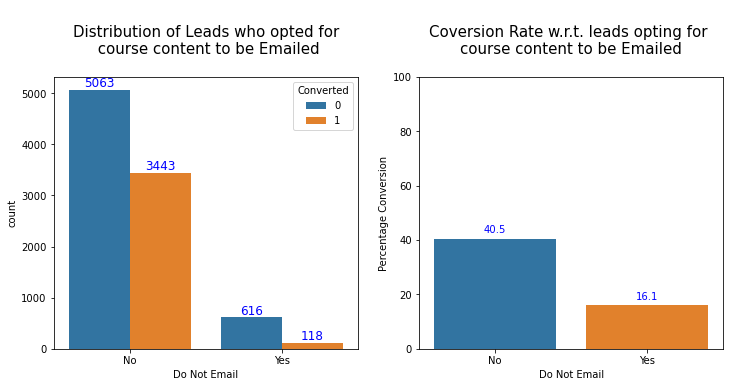

In [36]:
# Plot the distribution of each category
plt.figure(figsize=(12,5))
plt.subplot(121)
ax = sns.countplot(Leads1["Do Not Email"],hue=Leads1["Converted"])
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    plt.title("\nDistribution of Leads who opted for\n course content to be Emailed\n", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    
# Calculate the conversion rate of each category
df = Leads1.groupby(["Do Not Email"])['Converted'].apply(lambda p: p.count())
df = pd.DataFrame(df)
df.rename(columns={ 'Converted':"Total"},inplace = True)
df["Converted"] = Leads1.groupby(["Do Not Email"])['Converted'].sum()
df["Percentage Conversion"] = df["Converted"]*100/df["Total"]

# Plot the conversion rate of each category
plt.subplot(122)
ax=sns.barplot(df.index,df["Percentage Conversion"])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points', color='blue')
    #plt.xticks(rotation=90)
    plt.title("\nCoversion Rate w.r.t. leads opting for \ncourse content to be Emailed\n", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)
plt.show()

- **Inference 1**: *The percentage of Leads who want the course to be emailed are more compared to the percentage of people who do not want the course to be emailed.* 
- **Inference 2**: *Lead conversion rate is significantly high among Leads who prefer the course to be emailed compared to the Leads who prefer not to be emailed.*

#### Do Not Call

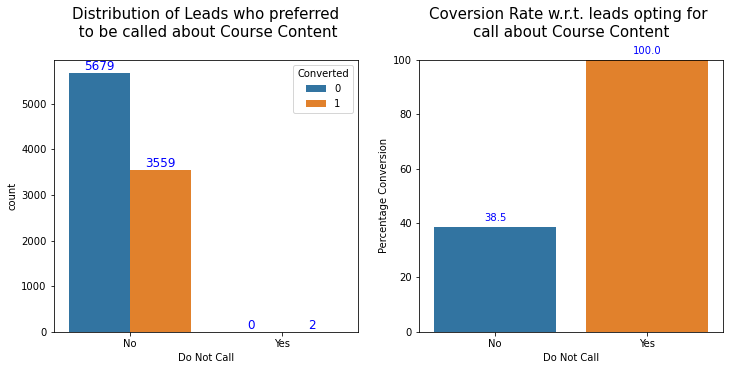

In [37]:
# Plot the distribution of each category
plt.figure(figsize=(12,5))
plt.subplot(121)
ax = sns.countplot(Leads1["Do Not Call"],hue=Leads1["Converted"])
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    plt.title("Distribution of Leads who preferred\n to be called about Course Content\n", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})

# Calculate the conversion rate of each category
df = Leads1.groupby(["Do Not Call"])['Converted'].apply(lambda p: p.count())
df = pd.DataFrame(df)
df.rename(columns={ 'Converted':"Total"},inplace = True)
df["Converted"] = Leads1.groupby(["Do Not Call"])['Converted'].sum()
df["Percentage Conversion"] = df["Converted"]*100/df["Total"]

# Plot the conversion rate of each category
plt.subplot(122)
ax=sns.barplot(df.index,df["Percentage Conversion"])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points', color='blue')
    #plt.xticks(rotation=90)
    plt.title("Coversion Rate w.r.t. leads opting for \ncall about Course Content\n", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)
plt.show()

- **Inference 1**: *Almost 99% of the Leads prefer to be called about the course. And they have around 40% conversion rate.*
- **Inference 2**: *The leads who prefer not to be called about the course are quite less in number but their conversion rate is comparitively high.*

#### Search

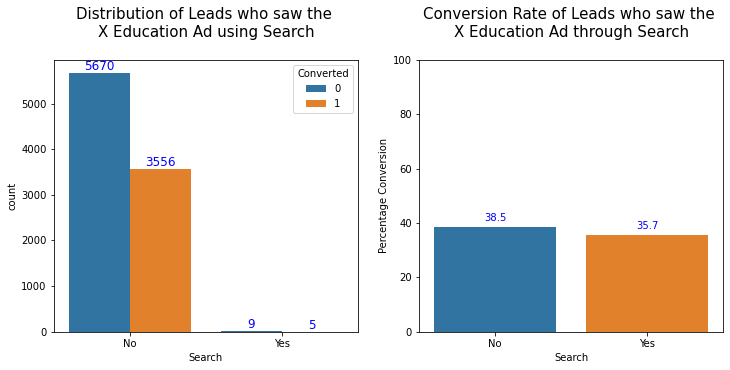

In [38]:
# Plot the distribution of each categroy
plt.figure(figsize=(12,5))
plt.subplot(121)
ax = sns.countplot(Leads1["Search"],hue=Leads1["Converted"])
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    plt.title("Distribution of Leads who saw the \nX Education Ad using Search\n", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})

# Calculate the conversion rate of each category
df = Leads1.groupby(["Search"])['Converted'].apply(lambda p: p.count())
df = pd.DataFrame(df)
df.rename(columns={ 'Converted':"Total"},inplace = True)
df["Converted"] = Leads1.groupby(["Search"])['Converted'].sum()
df["Percentage Conversion"] = df["Converted"]*100/df["Total"]

# Plot the conversion rate of each category
plt.subplot(122)
ax=sns.barplot(df.index,df["Percentage Conversion"])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points', color='blue')
    #plt.xticks(rotation=90)
    plt.title("Conversion Rate of Leads who saw the \nX Education Ad through Search\n", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)
plt.show()

- **Inference 1**: *Ratio of the leads who saw the ad in Search is low compared to the ratio of leads who did not.* 
- **Inference 2**: *The conversion rate of Leads who did not see the ad in Search is marginally high compared to those who did.*

#### Newspaper Article

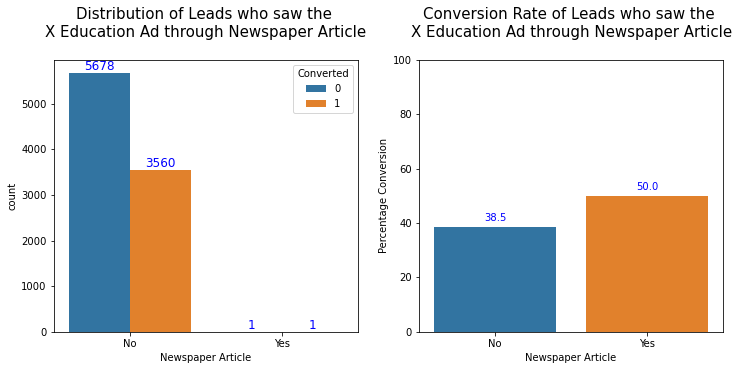

In [39]:
# Plot the distribution of each category
plt.figure(figsize=(12,5))
plt.subplot(121)
ax = sns.countplot(Leads1["Newspaper Article"],hue=Leads1["Converted"])
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    plt.title("Distribution of Leads who saw the \nX Education Ad through Newspaper Article\n", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})

# Calculate the conversion rate of each category
df = Leads1.groupby(["Newspaper Article"])['Converted'].apply(lambda p: p.count())
df = pd.DataFrame(df)
df.rename(columns={ 'Converted':"Total"},inplace = True)
df["Converted"] = Leads1.groupby(["Newspaper Article"])['Converted'].sum()
df["Percentage Conversion"] = df["Converted"]*100/df["Total"]

# Plot the conversion rate of each category
plt.subplot(122)
ax=sns.barplot(df.index,df["Percentage Conversion"])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points', color='blue')
    #plt.xticks(rotation=90)
    plt.title("Conversion Rate of Leads who saw the \nX Education Ad through Newspaper Article\n", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)
plt.show()

- **Inference 1**: *Most of the people did not see the Ad in the Newspaper Article.* 
- **Inference 2**: *Approximately 40% of people who did not see the Ad in the Newspaper Article are converted Leads*

#### X Education Forums

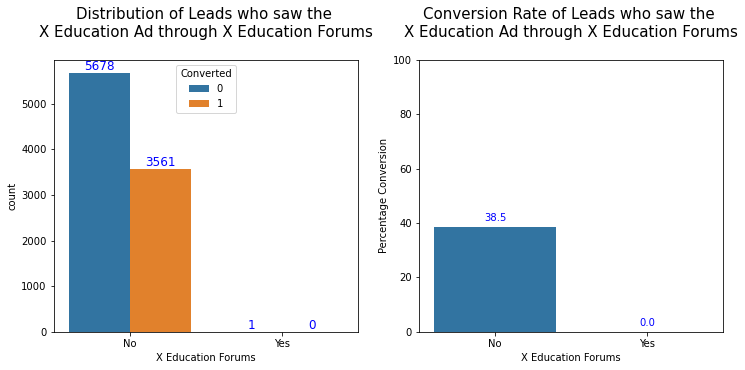

In [40]:
# Plot the distribution of each category
plt.figure(figsize=(12,5))
plt.subplot(121)
ax = sns.countplot(Leads1["X Education Forums"],hue=Leads1["Converted"])
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    plt.title("Distribution of Leads who saw the \nX Education Ad through X Education Forums\n", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})

# Calculate the conversion rate of each category
df = Leads1.groupby(["X Education Forums"])['Converted'].apply(lambda p: p.count())
df = pd.DataFrame(df)
df.rename(columns={ 'Converted':"Total"},inplace = True)
df["Converted"] = Leads1.groupby(["X Education Forums"])['Converted'].sum()
df["Percentage Conversion"] = df["Converted"]*100/df["Total"]

# Plot the conversion rate of each category
plt.subplot(122)
ax=sns.barplot(df.index,df["Percentage Conversion"])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points', color='blue')
    #plt.xticks(rotation=90)
    plt.title("Conversion Rate of Leads who saw the \nX Education Ad through X Education Forums\n", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)
plt.show()

- **Inference 1**: *Most of the people did not see the Ad in the X Education Forums * 
- **Inference 2**: *Approximately 40% of people who did not see the Ad in the X Education Forums are converted Leads*

#### Newspaper

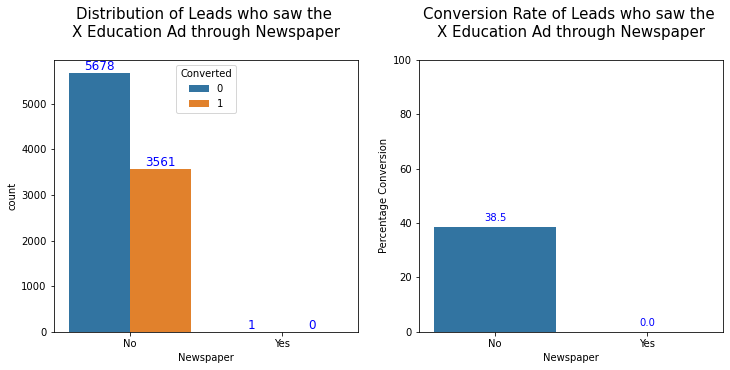

In [41]:
# Plot the distribution of each category
plt.figure(figsize=(12,5))
plt.subplot(121)
ax = sns.countplot(Leads1["Newspaper"],hue=Leads1["Converted"])
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    plt.title("Distribution of Leads who saw the \nX Education Ad through Newspaper\n", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})

# Calculate the conversion rate of each category
df = Leads1.groupby(["Newspaper"])['Converted'].apply(lambda p: p.count())
df = pd.DataFrame(df)
df.rename(columns={ 'Converted':"Total"},inplace = True)
df["Converted"] = Leads1.groupby(["Newspaper"])['Converted'].sum()
df["Percentage Conversion"] = df["Converted"]*100/df["Total"]

# Plot the conversion rate of each category
plt.subplot(122)
ax=sns.barplot(df.index,df["Percentage Conversion"])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points', color='blue')
    #plt.xticks(rotation=90)
    plt.title("Conversion Rate of Leads who saw the \nX Education Ad through Newspaper\n", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)
plt.show()

- **Inference 1**: *Most of the people did not see the Ad in the Newspaper * 
- **Inference 2**: *Approximately 40% of people who did not see the Ad in the Newspaper are converted Leads*

#### Digital Advertisement

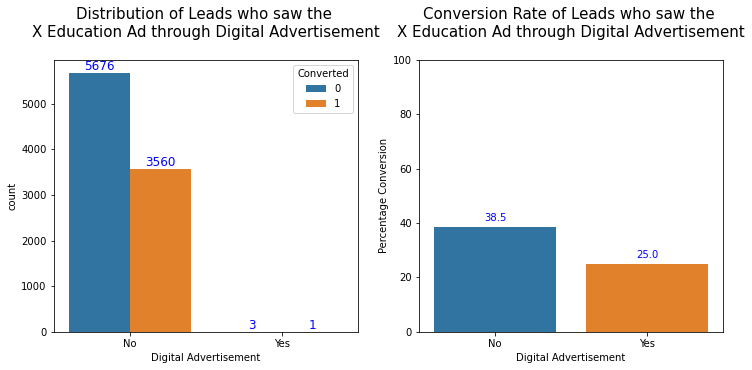

In [42]:
# Plot the distribution of each category
plt.figure(figsize=(12,5))
plt.subplot(121)
ax = sns.countplot(Leads1["Digital Advertisement"],hue=Leads1["Converted"])
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    plt.title("Distribution of Leads who saw the \nX Education Ad through Digital Advertisement\n", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})

# Calculate the conversion rate of each category
df = Leads1.groupby(["Digital Advertisement"])['Converted'].apply(lambda p: p.count())
df = pd.DataFrame(df)
df.rename(columns={ 'Converted':"Total"},inplace = True)
df["Converted"] = Leads1.groupby(["Digital Advertisement"])['Converted'].sum()
df["Percentage Conversion"] = df["Converted"]*100/df["Total"]

# Plot the conversion rate of each category
plt.subplot(122)
ax=sns.barplot(df.index,df["Percentage Conversion"])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points', color='blue')
    #plt.xticks(rotation=90)
    plt.title("Conversion Rate of Leads who saw the \nX Education Ad through Digital Advertisement\n", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)
plt.show()

- **Inference 1**: *Majority of the people did not see the Ad as a Digital Advertisement* 
- **Inference 2**: *People who did not see the Ad demonstrate better conversion rate compared to conversion rate among people who saw the Digital Advertisement.*
- **Inference 3**: *Compared to all forms of Ad that were presented, Digital Advertisement had better response than every other form of Ad.*

#### Through Recommendations

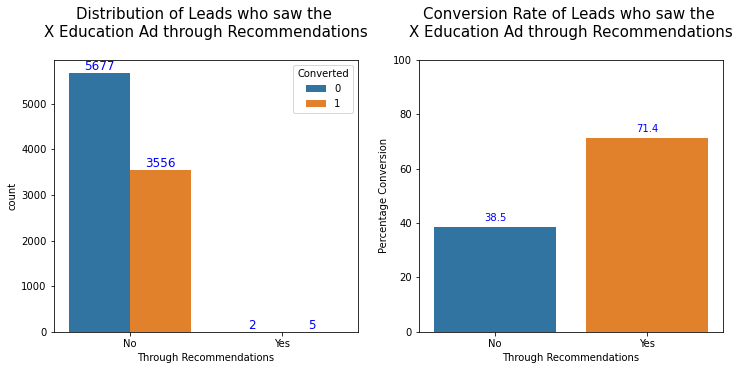

In [43]:
# Plot distribution of each category
plt.figure(figsize=(12,5))
plt.subplot(121)
ax = sns.countplot(Leads1["Through Recommendations"],hue=Leads1["Converted"])
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    plt.title("Distribution of Leads who saw the \nX Education Ad through Recommendations\n", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})

# Calculate the conversion rate of each category
df = Leads1.groupby(["Through Recommendations"])['Converted'].apply(lambda p: p.count())
df = pd.DataFrame(df)
df.rename(columns={ 'Converted':"Total"},inplace = True)
df["Converted"] = Leads1.groupby(["Through Recommendations"])['Converted'].sum()
df["Percentage Conversion"] = df["Converted"]*100/df["Total"]

# Plot the conversion rate of each category
plt.subplot(122)
ax=sns.barplot(df.index,df["Percentage Conversion"])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points', color='blue')
    #plt.xticks(rotation=90)
    plt.title("Conversion Rate of Leads who saw the \nX Education Ad through Recommendations\n", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)
plt.show()

- **Inference 1**: *Less than 1% of the people came through Recommendation.*
- **Inference 1**: *Conversion rate of people who came through recomendation is high compared to the people who did not come through recommendations*


#### A free copy of Mastering The Interview

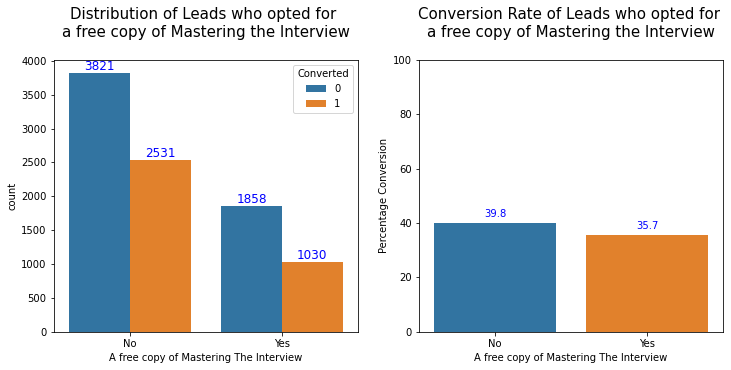

In [44]:
# Plot the distribution of each category
plt.figure(figsize=(12,5))
plt.subplot(121)
ax = sns.countplot(Leads1["A free copy of Mastering The Interview"],hue=Leads1["Converted"])
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    plt.title("Distribution of Leads who opted for \na free copy of Mastering the Interview\n", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})

# Calculate the conversion rate of each category
df = Leads1.groupby(["A free copy of Mastering The Interview"])['Converted'].apply(lambda p: p.count())
df = pd.DataFrame(df)
df.rename(columns={ 'Converted':"Total"},inplace = True)
df["Converted"] = Leads1.groupby(["A free copy of Mastering The Interview"])['Converted'].sum()
df["Percentage Conversion"] = df["Converted"]*100/df["Total"]

# Plot the conversion rate of each category
plt.subplot(122)
ax=sns.barplot(df.index,df["Percentage Conversion"])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points', color='blue')
    #plt.xticks(rotation=90)
    plt.title("Conversion Rate of Leads who opted for \na free copy of Mastering the Interview\n", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)
plt.show()

- **Inference 1**: *Approximately 31% of the Leads opted for a free copy of Mastering the Interview of which approximately 36% converted.*
- **Inference 1**: *Approximately 69% of leads did not opt for a free copy of Mastering the interview. And their conversion ratio is nearly 40%*
- **Inference 3**: *Conversion rate among people who opted for 'A free copy of Mastering the Interview' is higher than people who did not opt for it.

In [45]:
# Check the value counts percentage for Search column
Leads1["Search"].value_counts(normalize=True)*100

No     99.848485
Yes     0.151515
Name: Search, dtype: float64

In [46]:
# Check the value counts percentage for Digital Advertisement column
Leads1["Digital Advertisement"].value_counts(normalize=True)*100

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

In [47]:
# Check the value counts percentage for Through Recommendations column
Leads1["Through Recommendations"].value_counts(normalize=True)*100

No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

In [48]:
# Check the value counts percentage for Newspaper column
Leads1["Newspaper"].value_counts(normalize=True)*100

No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

In [49]:
# Check the value counts percentage for Newspaper Article column
Leads1["Newspaper Article"].value_counts(normalize=True)*100

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64

In [50]:
# Check the value counts percentage for X Education Forums column
Leads1["X Education Forums"].value_counts(normalize=True)*100

No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64

In [51]:
# Check the value counts percentage for Magazine column
Leads1["Magazine"].value_counts(normalize = True)*100

No    100.0
Name: Magazine, dtype: float64

In [52]:
# Check the value counts percentage for 'Update me on Supply Chain Content' column
Leads1["Update me on Supply Chain Content"].value_counts(normalize = True)*100

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [53]:
# Check the value counts percentage for Receive More Updates About out Courses column
Leads1["Receive More Updates About Our Courses"].value_counts(normalize = True)*100

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [54]:
# Check the value counts percentage for Get updates on DM Content column
Leads1["Get updates on DM Content"].value_counts(normalize = True)*100

No    100.0
Name: Get updates on DM Content, dtype: float64

In [55]:
# Check the value counts percentage for I agree to pay the amount through cheque column
Leads1["I agree to pay the amount through cheque"].value_counts(normalize = True)*100

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [56]:
# Check the value counts percentage for A free copy of Mastering The Interview column
Leads1["A free copy of Mastering The Interview"].value_counts(normalize = True)*100

No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64

**Inference:** Following columns are either highly skewed or having only one value. We will drop all these columns-<br>
- "Do Not Call","Magazine", "Through Recommendations", "Digital Advertisement", "Search", "Newspaper", "X Education Forums", "Update me on Supply Chain Content", "Receive More Updates About Our Courses", "Get updates on DM Content", "I agree to pay the amount through cheque"

In [57]:
# List the highly skewed columns
col_to_drop1 = ["Do Not Call","Newspaper","X Education Forums", "Through Recommendations", "Digital Advertisement", "Search",
                    "Newspaper Article","Magazine","Update me on Supply Chain Content","Receive More Updates About Our Courses",
                   "Get updates on DM Content","I agree to pay the amount through cheque"]


In [58]:
# Drop the highly skewed columns
Leads2 = Leads1.drop(col_to_drop1,axis=1)
Leads2.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Not Specified,Unemployed,No
1,660728,API,Organic Search,No,0,5.0,674,2.5,Not Specified,Unemployed,No
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Business Administration,Student,Yes
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Media and Advertising,Unemployed,No
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Not Specified,Unemployed,No


In [59]:
# Re-check the shape of the data frame
Leads2.shape

(9240, 11)

In [60]:
# Re-check the null value count of all columns in the data frame
Leads2.isnull().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
dtype: int64

## Analysis of continuous variable

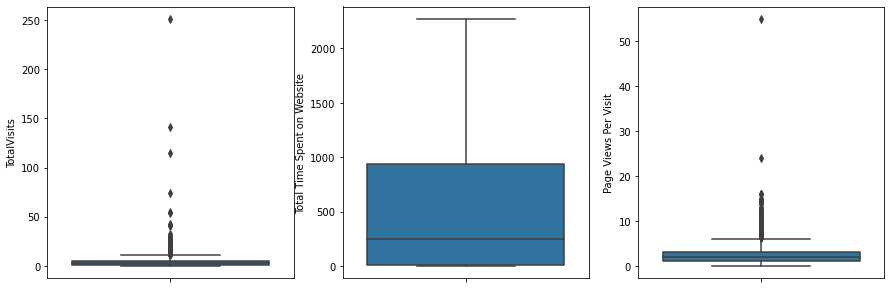

In [61]:
# Plot the continous variables of the data set
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.boxplot(y=Leads2["TotalVisits"])
plt.subplot(132)
sns.boxplot(y=Leads2["Total Time Spent on Website"])
plt.subplot(133)
sns.boxplot(y=Leads2["Page Views Per Visit"]);

**Inference:** We can observe outliers in "TotalVisits" and "Page Views Per Visit"

In [62]:
# Checking for outliers in the continuous variables
num_var = Leads2[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num_var.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


In [63]:
# Outlier calculation for 'TotalVisits'
IQR=Leads2['TotalVisits'].quantile(0.75)-Leads2['TotalVisits'].quantile(0.25)
x=Leads2['TotalVisits'].quantile(0.75)+3*IQR

In [64]:
# Outlier calculation for 'Page Views PEr Visit'
IQR=Leads2['Page Views Per Visit'].quantile(0.75)-Leads2['Page Views Per Visit'].quantile(0.25)
y=Leads2['Page Views Per Visit'].quantile(0.75)+3*IQR

In [65]:
# Remove outliers
Leads2 = Leads2[Leads2['TotalVisits']<x]
Leads2 = Leads2[Leads2['Page Views Per Visit']<y]

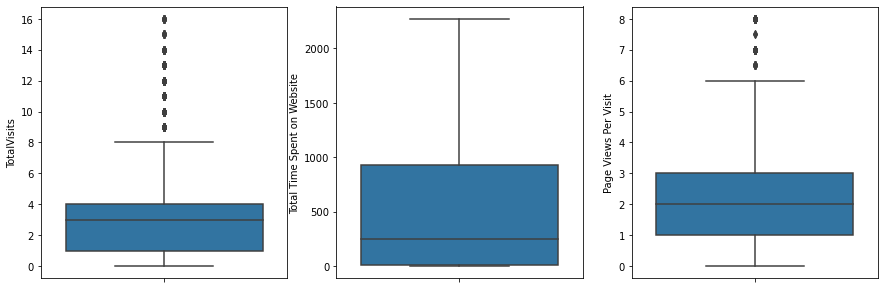

In [66]:
# Re-plot the continous variables of the data set after outlier handling
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.boxplot(y=Leads2["TotalVisits"])
plt.subplot(132)
sns.boxplot(y=Leads2["Total Time Spent on Website"])
plt.subplot(133)
sns.boxplot(y=Leads2["Page Views Per Visit"]);

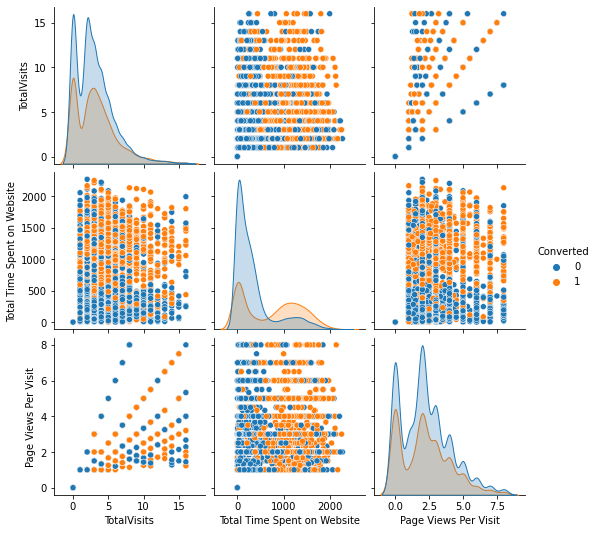

In [67]:
# Plot the continous variables in pair plot to check the relation w.r.t to each other
sns.pairplot(kind='scatter', data=Leads2, hue='Converted', vars=num_var );

- **Inference**: *TotalVisits and Page Views Per Visit appear to be highly correlated.*

<div class="alert alert-block alert-info">
<h1><b> Data Preparation</b></h1>
</div>

In [68]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
Leads2[varlist] = Leads2[varlist].apply(binary_map)

In [69]:
# Check the structure of the data set
Leads2.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Not Specified,Unemployed,0
1,660728,API,Organic Search,0,0,5.0,674,2.5,Not Specified,Unemployed,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,1
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,0
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Not Specified,Unemployed,0


In [70]:
# Creating dummies for the following columns below

# Lead Origin : 

d_lead_origin = pd.get_dummies(Leads2['Lead Origin'], prefix='LeadOrigin')
d_lead_origin1 = d_lead_origin.drop(['LeadOrigin_API'], 1)
Leads2 = pd.concat([Leads2, d_lead_origin1], axis = 1)

# Lead Source :

d_lead_source = pd.get_dummies(Leads2['Lead Source'], prefix='LeadSource')
d_lead_source1 = d_lead_source.drop(['LeadSource_Direct Traffic'], 1)
Leads2 = pd.concat([Leads2,d_lead_source1], axis=1)

# What is your current occupation

d_curr_occupation = pd.get_dummies(Leads2['What is your current occupation'], prefix='CurrentOccupation')
d_curr_occupation1 = d_curr_occupation.drop(['CurrentOccupation_Unknown'], 1)
Leads2 = pd.concat([Leads2,d_curr_occupation1], axis=1)

# Specialization

d_specialization = pd.get_dummies(Leads2['Specialization'], prefix='Specialization')
d_specialization1 = d_specialization.drop(['Specialization_Not Specified'], 1)
Leads2 = pd.concat([Leads2,d_specialization1], axis=1)


In [71]:
# Remove columns for which we have created dummies
Leads3 = Leads2.drop(['Lead Origin', 'Lead Source','What is your current occupation','Specialization'],1)
Leads3.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Others,LeadSource_Reference,CurrentOccupation_Others,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specializations,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
# Check for null values
Leads3.isnull().sum()*100/Leads3.shape[0]

Lead Number                                         0.0
Do Not Email                                        0.0
Converted                                           0.0
TotalVisits                                         0.0
Total Time Spent on Website                         0.0
Page Views Per Visit                                0.0
A free copy of Mastering The Interview              0.0
LeadOrigin_Landing Page Submission                  0.0
LeadOrigin_Lead Add Form                            0.0
LeadOrigin_Lead Import                              0.0
LeadOrigin_Quick Add Form                           0.0
LeadSource_Google                                   0.0
LeadSource_Olark Chat                               0.0
LeadSource_Organic Search                           0.0
LeadSource_Others                                   0.0
LeadSource_Reference                                0.0
CurrentOccupation_Others                            0.0
CurrentOccupation_Student                       

In [73]:
# Shape of the dataframe
Leads3.shape

(9029, 31)

<div class="alert alert-block alert-info">
<h1><b> Splitting the Data into Training and Testing Sets</b></h1>
</div>

### Train-Test Split

In [74]:
# Putting feature variable to X
X = Leads3.drop(['Converted','Lead Number'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Others,LeadSource_Reference,CurrentOccupation_Others,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specializations,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
# Putting Target variable to y
y = Leads3['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [76]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=4)

### Feature Scaling

In [77]:
# Scaling the continous features using Standard Scaler
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Others,LeadSource_Reference,CurrentOccupation_Others,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specializations,Specialization_Supply Chain Management,Specialization_Travel and Tourism
3330,0,2.785440,0.871622,0.281933,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
6841,0,-0.394917,-0.135560,-0.129400,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2298,0,-1.101663,-0.887298,-1.226285,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3509,0,0.665202,1.698169,1.515929,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2920,0,0.311829,1.231070,0.967486,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [78]:
### Checking the Conversion Rate
percent_converted = (sum(Leads3['Converted'])/len(Leads3['Converted'].index))*100
percent_converted

38.50924797873519

**We have almost 38% churn rate**

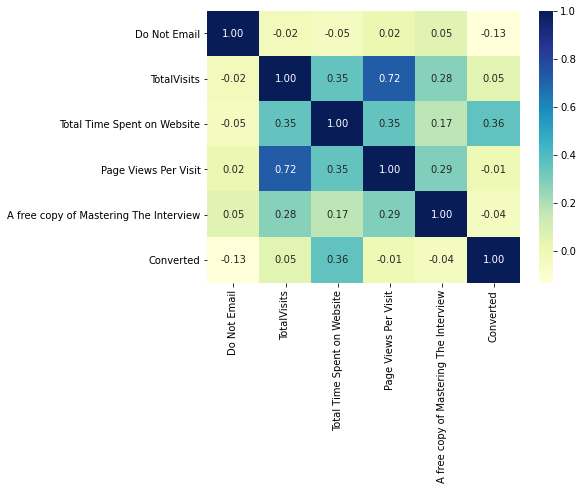

In [79]:
# Let's see the correlation matrix 
plt.figure(figsize=(7,5))
sns.heatmap(Leads3[["Do Not Email","TotalVisits","Total Time Spent on Website","Page Views Per Visit",
                    "A free copy of Mastering The Interview","Converted"]].corr(),annot=True, cmap="YlGnBu",fmt="0.2f")
plt.show()

<div class="alert alert-block alert-info">
<h1><b> Building a logistic model</b></h1>
</div>

### Running Your First Training Model

In [80]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6291
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2772.6
Date:                Sun, 16 May 2021   Deviance:                       5545.2
Time:                        12:56:07   Pearson chi2:                 7.90e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.3986      0.143    -16.764      0.000      -2.679      -2.118
Do Not Email                                        -1.1173      0.160     -6.964      0.000      -1.432      -0.803
TotalVisits                                          0.2560      0.048      5.305      0.000       0.161       0.351
Total Time Spent on Website                          1.0615      0.039     27.171      0.000       0.985       1.138
Page Views Per Visit                                -0.1575      0.055     -2.854      0.004      -0.266      -0.049
A free copy of Mastering The Interview              -0.0952      0.106     -0.897      0.370      -0.303       0.113
LeadOrigin_Landing Page Submission                  -0.6922      0.133     -5.205      0.000      -0.953      -0.432
LeadOrigin_Lead Add Form                             4.4762      0.418     10.721      0.000       3.658       5.295
LeadOrigin_Lead Import                              -0.1452      0.489     -0.297      0.767      -1.104       0.814
LeadOrigin_Quick Add Form                        -3.676e-15   2.28e-15     -1.611      0.107   -8.15e-15    7.98e-16
LeadSource_Google                                    0.2223      0.111      2.004      0.045       0.005       0.440
LeadSource_Olark Chat                                1.1584      0.158      7.344      0.000       0.849       1.468
LeadSource_Organic Search                            0.2189      0.127      1.723      0.085      -0.030       0.468
LeadSource_Others                                    0.2055      0.286      0.720      0.472      -0.354       0.765
LeadSource_Reference                                -0.8120      0.477     -1.702      0.089      -1.747       0.123
CurrentOccupation_Others                             1.8324      0.575      3.187      0.001       0.705       2.959
CurrentOccupation_Student                            1.0451      0.232      4.503      0.000       0.590       1.500
CurrentOccupation_Unemployed                         1.3614      0.087     15.563      0.000       1.190       1.533
CurrentOccupation_Working Professional               3.7622      0.207     18.217      0.000       3.357       4.167
Specialization_Banking, Investment And Insurance     1.1462      0.209      5.484      0.000       0.737       1.556
Specialization_Business Administration               0.8943      0.197      4.548      0.000       0.509       1.280
Specialization_Finance Management                    0.8263      0.155      5.322      0.000       0.522       1.131
Specialization_Human Resource Management             0.9409      0.159      5.914      0.000       0.629       1.253
Specialization_IT Projects Management    

### Feature Selection Using RFE

In [81]:
# Initiating the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [82]:
# Running RFE with the output number of the variable equal to 20
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [83]:
# List the features and their rankings
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('A free copy of Mastering The Interview', False, 9),
 ('LeadOrigin_Landing Page Submission', True, 1),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 6),
 ('LeadOrigin_Quick Add Form', False, 10),
 ('LeadSource_Google', False, 5),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 7),
 ('LeadSource_Others', False, 4),
 ('LeadSource_Reference', False, 2),
 ('CurrentOccupation_Others', True, 1),
 ('CurrentOccupation_Student', True, 1),
 ('CurrentOccupation_Unemployed', True, 1),
 ('CurrentOccupation_Working Professional', True, 1),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_IT Projects Management', True, 1)

In [84]:
# Store the features selected by the RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Add Form',
       'LeadSource_Olark Chat', 'CurrentOccupation_Others',
       'CurrentOccupation_Student', 'CurrentOccupation_Unemployed',
       'CurrentOccupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Other Specializations',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism'],
      dtype='object')

In [85]:
# List the features not selected by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'LeadOrigin_Lead Import',
       'LeadOrigin_Quick Add Form', 'LeadSource_Google',
       'LeadSource_Organic Search', 'LeadSource_Others',
       'LeadSource_Reference'],
      dtype='object')

## Assessing the model with StatsModels

### Model - 1

In [86]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2796.0
Date:                Sun, 16 May 2021   Deviance:                       5592.0
Time:                        12:56:07   Pearson chi2:                 8.49e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.1543      0.104    -20.756      0.000      -2.358      -1.951
Do Not Email                                        -1.1247      0.156     -7.194      0.000      -1.431      -0.818
Total Time Spent on Website                          1.0680      0.039     27.565      0.000       0.992       1.144
LeadOrigin_Landing Page Submission                  -0.8186      0.123     -6.644      0.000      -1.060      -0.577
LeadOrigin_Lead Add Form                             3.7527      0.210     17.890      0.000       3.342       4.164
LeadSource_Olark Chat                                0.8588      0.115      7.465      0.000       0.633       1.084
CurrentOccupation_Others                             1.8773      0.583      3.218      0.001       0.734       3.021
CurrentOccupation_Student                            0.9812      0.231      4.241      0.000       0.528       1.435
CurrentOccupation_Unemployed                         1.3436      0.087     15.441      0.000       1.173       1.514
CurrentOccupation_Working Professional               3.7279      0.205     18.144      0.000       3.325       4.131
Specialization_Banking, Investment And Insurance     1.1250      0.206      5.459      0.000       0.721       1.529
Specialization_Business Administration               0.8841      0.194      4.567      0.000       0.505       1.263
Specialization_Finance Management                    0.8312      0.152      5.473      0.000       0.534       1.129
Specialization_Human Resource Management             0.9419      0.156      6.056      0.000       0.637       1.247
Specialization_IT Projects Management                0.7134      0.205      3.481      0.000       0.312       1.115
Specialization_Marketing Management                  0.8407      0.153      5.501      0.000       0.541       1.140
Specialization_Media and Advertising                 0.8642      0.245      3.529      0.000       0.384       1.344
Specialization_Operations Management                 0.9914      0.181      5.476      0.000       0.637       1.346
Specialization_Other Specializations                 0.7253      0.159      4.553      0.000       0.413       1.038
Specialization_Supply Chain Management               0.9216      0.202      4.565      0.000       0.526       1.317
Specialization_Travel and Tourism                    0.8487      0.256      3.311      0.001       0.346       1.351
====================================================================================================================
"""

In [87]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3330    0.541343
6841    0.280310
2298    0.289148
3509    0.418706
2920    0.306305
6081    0.160530
4961    0.415055
6839    0.694364
4629    0.183653
2530    0.079808
dtype: float64

In [88]:
# Creating a data frame named y_train_pred_final to store target variable and its probability
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
3330,1,0.541343
6841,0,0.280310
2298,0,0.289148
3509,0,0.418706
2920,0,0.306305


In [89]:
# Creating a column 'Predicted' with value 1 if conversion rate is >0.5
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
3330,1,0.541343,1
6841,0,0.280310,0
2298,0,0.289148,0
3509,0,0.418706,0
2920,0,0.306305,0


In [90]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3488  415]
 [ 825 1592]]


In [91]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8037974683544303


### Checking VIFs

In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,LeadOrigin_Landing Page Submission,6.46
7,CurrentOccupation_Unemployed,2.47
11,Specialization_Finance Management,2.14
12,Specialization_Human Resource Management,1.93
17,Specialization_Other Specializations,1.92
14,Specialization_Marketing Management,1.87
16,Specialization_Operations Management,1.56
3,LeadOrigin_Lead Add Form,1.50
10,Specialization_Business Administration,1.47
8,CurrentOccupation_Working Professional,1.44


### MODEL - 2

In [93]:
# Drop 'LeadOrigin_Landing Page Submission' because of high VIF
col =col.drop('LeadOrigin_Landing Page Submission')

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()

# Summary of the model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2818.4
Date:                Sun, 16 May 2021   Deviance:                       5636.9
Time:                        12:56:08   Pearson chi2:                 7.82e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.3442      0.102    -23.045      0.000      -2.544      -2.145
Do Not Email                                        -1.1753      0.156     -7.544      0.000      -1.481      -0.870
Total Time Spent on Website                          1.0757      0.039     27.840      0.000       1.000       1.151
LeadOrigin_Lead Add Form                             4.0886      0.202     20.204      0.000       3.692       4.485
LeadSource_Olark Chat                                1.1220      0.109     10.306      0.000       0.909       1.335
CurrentOccupation_Others                             2.0225      0.585      3.456      0.001       0.875       3.169
CurrentOccupation_Student                            0.9804      0.227      4.311      0.000       0.535       1.426
CurrentOccupation_Unemployed                         1.3824      0.087     15.957      0.000       1.213       1.552
CurrentOccupation_Working Professional               3.8174      0.203     18.820      0.000       3.420       4.215
Specialization_Banking, Investment And Insurance     0.5575      0.185      3.012      0.003       0.195       0.920
Specialization_Business Administration               0.3121      0.171      1.820      0.069      -0.024       0.648
Specialization_Finance Management                    0.2530      0.123      2.049      0.040       0.011       0.495
Specialization_Human Resource Management             0.3778      0.129      2.931      0.003       0.125       0.631
Specialization_IT Projects Management                0.1479      0.186      0.794      0.427      -0.217       0.513
Specialization_Marketing Management                  0.3183      0.130      2.454      0.014       0.064       0.573
Specialization_Media and Advertising                 0.2704      0.227      1.189      0.234      -0.175       0.716
Specialization_Operations Management                 0.4215      0.158      2.668      0.008       0.112       0.731
Specialization_Other Specializations                 0.1633      0.134      1.219      0.223      -0.099       0.426
Specialization_Supply Chain Management               0.3514      0.181      1.940      0.052      -0.004       0.706
Specialization_Travel and Tourism                    0.2520      0.238      1.057      0.290      -0.215       0.719
====================================================================================================================
"""

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,CurrentOccupation_Unemployed,2.42
7,CurrentOccupation_Working Professional,1.42
3,LeadSource_Olark Chat,1.34
2,LeadOrigin_Lead Add Form,1.26
1,Total Time Spent on Website,1.26
10,Specialization_Finance Management,1.24
13,Specialization_Marketing Management,1.22
11,Specialization_Human Resource Management,1.21
16,Specialization_Other Specializations,1.20
15,Specialization_Operations Management,1.13


### MODEL - 3

In [95]:
# Drop 'Specialization_IT Projects Management' due to high P-Value
col = col.drop('Specialization_IT Projects Management')
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2818.8
Date:                Sun, 16 May 2021   Deviance:                       5637.5
Time:                        12:56:09   Pearson chi2:                 7.80e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.3229      0.098    -23.726      0.000      -2.515      -2.131
Do Not Email                                        -1.1727      0.156     -7.523      0.000      -1.478      -0.867
Total Time Spent on Website                          1.0760      0.039     27.850      0.000       1.000       1.152
LeadOrigin_Lead Add Form                             4.0743      0.201     20.232      0.000       3.680       4.469
LeadSource_Olark Chat                                1.1030      0.106     10.401      0.000       0.895       1.311
CurrentOccupation_Others                             2.0363      0.585      3.478      0.001       0.889       3.184
CurrentOccupation_Student                            0.9824      0.227      4.322      0.000       0.537       1.428
CurrentOccupation_Unemployed                         1.3851      0.087     16.002      0.000       1.215       1.555
CurrentOccupation_Working Professional               3.8261      0.202     18.898      0.000       3.429       4.223
Specialization_Banking, Investment And Insurance     0.5350      0.183      2.926      0.003       0.177       0.893
Specialization_Business Administration               0.2890      0.169      1.711      0.087      -0.042       0.620
Specialization_Finance Management                    0.2301      0.120      1.918      0.055      -0.005       0.465
Specialization_Human Resource Management             0.3549      0.126      2.827      0.005       0.109       0.601
Specialization_Marketing Management                  0.2961      0.127      2.339      0.019       0.048       0.544
Specialization_Media and Advertising                 0.2468      0.225      1.095      0.274      -0.195       0.689
Specialization_Operations Management                 0.3984      0.155      2.567      0.010       0.094       0.703
Specialization_Other Specializations                 0.1401      0.131      1.073      0.283      -0.116       0.396
Specialization_Supply Chain Management               0.3285      0.179      1.838      0.066      -0.022       0.679
Specialization_Travel and Tourism                    0.2282      0.236      0.965      0.334      -0.235       0.692
====================================================================================================================
"""

In [96]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,CurrentOccupation_Unemployed,2.27
7,CurrentOccupation_Working Professional,1.39
3,LeadSource_Olark Chat,1.33
2,LeadOrigin_Lead Add Form,1.26
1,Total Time Spent on Website,1.26
10,Specialization_Finance Management,1.22
12,Specialization_Marketing Management,1.21
15,Specialization_Other Specializations,1.19
11,Specialization_Human Resource Management,1.19
14,Specialization_Operations Management,1.12


### MODEL - 4

In [97]:
# Drop 'Specialization_Travel and Tourism' because of high p-value
col = col.drop('Specialization_Travel and Tourism')
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2819.2
Date:                Sun, 16 May 2021   Deviance:                       5638.4
Time:                        12:56:09   Pearson chi2:                 7.78e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.3069      0.096    -23.943      0.000      -2.496      -2.118
Do Not Email                                        -1.1676      0.156     -7.493      0.000      -1.473      -0.862
Total Time Spent on Website                          1.0771      0.039     27.880      0.000       1.001       1.153
LeadOrigin_Lead Add Form                             4.0616      0.201     20.227      0.000       3.668       4.455
LeadSource_Olark Chat                                1.0890      0.105     10.378      0.000       0.883       1.295
CurrentOccupation_Others                             2.0383      0.585      3.482      0.000       0.891       3.186
CurrentOccupation_Student                            0.9853      0.227      4.337      0.000       0.540       1.431
CurrentOccupation_Unemployed                         1.3880      0.087     16.044      0.000       1.218       1.558
CurrentOccupation_Working Professional               3.8328      0.202     18.946      0.000       3.436       4.229
Specialization_Banking, Investment And Insurance     0.5170      0.182      2.843      0.004       0.161       0.873
Specialization_Business Administration               0.2707      0.168      1.613      0.107      -0.058       0.600
Specialization_Finance Management                    0.2117      0.118      1.788      0.074      -0.020       0.444
Specialization_Human Resource Management             0.3365      0.124      2.713      0.007       0.093       0.580
Specialization_Marketing Management                  0.2783      0.125      2.224      0.026       0.033       0.524
Specialization_Media and Advertising                 0.2279      0.225      1.015      0.310      -0.212       0.668
Specialization_Operations Management                 0.3800      0.154      2.467      0.014       0.078       0.682
Specialization_Other Specializations                 0.1214      0.129      0.940      0.347      -0.132       0.374
Specialization_Supply Chain Management               0.3102      0.178      1.745      0.081      -0.038       0.659
====================================================================================================================
"""

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,CurrentOccupation_Unemployed,2.19
7,CurrentOccupation_Working Professional,1.37
3,LeadSource_Olark Chat,1.32
1,Total Time Spent on Website,1.26
2,LeadOrigin_Lead Add Form,1.25
10,Specialization_Finance Management,1.21
12,Specialization_Marketing Management,1.20
11,Specialization_Human Resource Management,1.19
15,Specialization_Other Specializations,1.18
14,Specialization_Operations Management,1.11


### Model - 5

In [99]:
# Drop 'Specialization_Other Specializations' because of high p-value
col = col.drop('Specialization_Other Specializations')
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2819.7
Date:                Sun, 16 May 2021   Deviance:                       5639.3
Time:                        12:56:09   Pearson chi2:                 7.76e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.2799      0.092    -24.845      0.000      -2.460      -2.100
Do Not Email                                        -1.1631      0.156     -7.465      0.000      -1.468      -0.858
Total Time Spent on Website                          1.0779      0.039     27.903      0.000       1.002       1.154
LeadOrigin_Lead Add Form                             4.0472      0.200     20.232      0.000       3.655       4.439
LeadSource_Olark Chat                                1.0658      0.102     10.467      0.000       0.866       1.265
CurrentOccupation_Others                             2.0479      0.586      3.497      0.000       0.900       3.196
CurrentOccupation_Student                            0.9936      0.227      4.384      0.000       0.549       1.438
CurrentOccupation_Unemployed                         1.3914      0.086     16.102      0.000       1.222       1.561
CurrentOccupation_Working Professional               3.8465      0.202     19.060      0.000       3.451       4.242
Specialization_Banking, Investment And Insurance     0.4879      0.179      2.723      0.006       0.137       0.839
Specialization_Business Administration               0.2411      0.165      1.463      0.143      -0.082       0.564
Specialization_Finance Management                    0.1821      0.114      1.596      0.110      -0.041       0.406
Specialization_Human Resource Management             0.3069      0.120      2.560      0.010       0.072       0.542
Specialization_Marketing Management                  0.2497      0.121      2.058      0.040       0.012       0.487
Specialization_Media and Advertising                 0.1977      0.222      0.889      0.374      -0.238       0.633
Specialization_Operations Management                 0.3503      0.151      2.325      0.020       0.055       0.646
Specialization_Supply Chain Management               0.2808      0.175      1.605      0.108      -0.062       0.624
====================================================================================================================
"""

In [100]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,CurrentOccupation_Unemployed,1.93
3,LeadSource_Olark Chat,1.31
7,CurrentOccupation_Working Professional,1.31
1,Total Time Spent on Website,1.26
2,LeadOrigin_Lead Add Form,1.25
10,Specialization_Finance Management,1.18
12,Specialization_Marketing Management,1.17
11,Specialization_Human Resource Management,1.16
14,Specialization_Operations Management,1.10
9,Specialization_Business Administration,1.08


### Model - 6

In [101]:
# Drop 'Specialization_Media and Advertising' because of high p-value
col = col.drop('Specialization_Media and Advertising')
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2820.1
Date:                Sun, 16 May 2021   Deviance:                       5640.1
Time:                        12:56:09   Pearson chi2:                 7.76e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.2690      0.091    -24.970      0.000      -2.447      -2.091
Do Not Email                                        -1.1624      0.156     -7.465      0.000      -1.468      -0.857
Total Time Spent on Website                          1.0787      0.039     27.927      0.000       1.003       1.154
LeadOrigin_Lead Add Form                             4.0389      0.200     20.219      0.000       3.647       4.430
LeadSource_Olark Chat                                1.0568      0.101     10.438      0.000       0.858       1.255
CurrentOccupation_Others                             2.0629      0.585      3.526      0.000       0.916       3.209
CurrentOccupation_Student                            0.9925      0.227      4.378      0.000       0.548       1.437
CurrentOccupation_Unemployed                         1.3933      0.086     16.129      0.000       1.224       1.563
CurrentOccupation_Working Professional               3.8534      0.202     19.106      0.000       3.458       4.249
Specialization_Banking, Investment And Insurance     0.4759      0.179      2.664      0.008       0.126       0.826
Specialization_Business Administration               0.2287      0.164      1.393      0.164      -0.093       0.550
Specialization_Finance Management                    0.1697      0.113      1.500      0.134      -0.052       0.392
Specialization_Human Resource Management             0.2946      0.119      2.474      0.013       0.061       0.528
Specialization_Marketing Management                  0.2376      0.121      1.971      0.049       0.001       0.474
Specialization_Operations Management                 0.3378      0.150      2.252      0.024       0.044       0.632
Specialization_Supply Chain Management               0.2685      0.174      1.540      0.124      -0.073       0.610
====================================================================================================================
"""

In [102]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,CurrentOccupation_Unemployed,1.88
3,LeadSource_Olark Chat,1.31
7,CurrentOccupation_Working Professional,1.30
1,Total Time Spent on Website,1.26
2,LeadOrigin_Lead Add Form,1.25
10,Specialization_Finance Management,1.18
12,Specialization_Marketing Management,1.17
11,Specialization_Human Resource Management,1.15
13,Specialization_Operations Management,1.09
9,Specialization_Business Administration,1.08


### MODEL - 7

In [103]:
# Drop 'Specialization_Business Administration' due to high p-value
col = col.drop('Specialization_Business Administration')
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2821.0
Date:                Sun, 16 May 2021   Deviance:                       5642.0
Time:                        12:56:10   Pearson chi2:                 7.76e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.2483      0.089    -25.122      0.000      -2.424      -2.073
Do Not Email                                        -1.1666      0.156     -7.488      0.000      -1.472      -0.861
Total Time Spent on Website                          1.0790      0.039     27.943      0.000       1.003       1.155
LeadOrigin_Lead Add Form                             4.0268      0.199     20.191      0.000       3.636       4.418
LeadSource_Olark Chat                                1.0382      0.100     10.362      0.000       0.842       1.235
CurrentOccupation_Others                             2.1055      0.585      3.601      0.000       0.959       3.252
CurrentOccupation_Student                            0.9969      0.227      4.397      0.000       0.552       1.441
CurrentOccupation_Unemployed                         1.3981      0.086     16.197      0.000       1.229       1.567
CurrentOccupation_Working Professional               3.8622      0.202     19.164      0.000       3.467       4.257
Specialization_Banking, Investment And Insurance     0.4523      0.178      2.543      0.011       0.104       0.801
Specialization_Finance Management                    0.1458      0.112      1.303      0.192      -0.073       0.365
Specialization_Human Resource Management             0.2706      0.118      2.298      0.022       0.040       0.501
Specialization_Marketing Management                  0.2140      0.119      1.793      0.073      -0.020       0.448
Specialization_Operations Management                 0.3139      0.149      2.106      0.035       0.022       0.606
Specialization_Supply Chain Management               0.2447      0.174      1.410      0.159      -0.095       0.585
====================================================================================================================
"""

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,CurrentOccupation_Unemployed,1.78
3,LeadSource_Olark Chat,1.31
7,CurrentOccupation_Working Professional,1.28
1,Total Time Spent on Website,1.26
2,LeadOrigin_Lead Add Form,1.25
9,Specialization_Finance Management,1.16
11,Specialization_Marketing Management,1.15
10,Specialization_Human Resource Management,1.14
12,Specialization_Operations Management,1.09
13,Specialization_Supply Chain Management,1.07


### MODEL - 8

In [105]:
# Drop 'Specialization_Finance Management' due to high p-value
col = col.drop('Specialization_Finance Management')
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2821.9
Date:                Sun, 16 May 2021   Deviance:                       5643.7
Time:                        12:56:10   Pearson chi2:                 7.75e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.2209      0.087    -25.588      0.000      -2.391      -2.051
Do Not Email                                        -1.1726      0.156     -7.529      0.000      -1.478      -0.867
Total Time Spent on Website                          1.0803      0.039     27.993      0.000       1.005       1.156
LeadOrigin_Lead Add Form                             4.0129      0.199     20.163      0.000       3.623       4.403
LeadSource_Olark Chat                                1.0160      0.099     10.311      0.000       0.823       1.209
CurrentOccupation_Others                             2.1071      0.583      3.616      0.000       0.965       3.249
CurrentOccupation_Student                            1.0033      0.226      4.432      0.000       0.560       1.447
CurrentOccupation_Unemployed                         1.4015      0.086     16.249      0.000       1.232       1.571
CurrentOccupation_Working Professional               3.8751      0.201     19.243      0.000       3.480       4.270
Specialization_Banking, Investment And Insurance     0.4231      0.176      2.398      0.016       0.077       0.769
Specialization_Human Resource Management             0.2410      0.116      2.086      0.037       0.015       0.467
Specialization_Marketing Management                  0.1853      0.117      1.580      0.114      -0.045       0.415
Specialization_Operations Management                 0.2840      0.147      1.929      0.054      -0.005       0.573
Specialization_Supply Chain Management               0.2153      0.172      1.251      0.211      -0.122       0.553
====================================================================================================================
"""

In [106]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,CurrentOccupation_Unemployed,1.60
3,LeadSource_Olark Chat,1.31
1,Total Time Spent on Website,1.26
2,LeadOrigin_Lead Add Form,1.25
7,CurrentOccupation_Working Professional,1.23
10,Specialization_Marketing Management,1.13
9,Specialization_Human Resource Management,1.12
11,Specialization_Operations Management,1.08
12,Specialization_Supply Chain Management,1.06
0,Do Not Email,1.05


### MODEL - 9

In [107]:
# Drop 'Specialization_Supply Chain Management' due to high p-value
col = col.drop('Specialization_Supply Chain Management')
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2822.6
Date:                Sun, 16 May 2021   Deviance:                       5645.3
Time:                        12:56:10   Pearson chi2:                 7.75e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.2093      0.086    -25.623      0.000      -2.378      -2.040
Do Not Email                                        -1.1737      0.156     -7.531      0.000      -1.479      -0.868
Total Time Spent on Website                          1.0803      0.039     27.997      0.000       1.005       1.156
LeadOrigin_Lead Add Form                             4.0033      0.199     20.137      0.000       3.614       4.393
LeadSource_Olark Chat                                1.0056      0.098     10.251      0.000       0.813       1.198
CurrentOccupation_Others                             2.1027      0.583      3.608      0.000       0.961       3.245
CurrentOccupation_Student                            1.0037      0.226      4.435      0.000       0.560       1.447
CurrentOccupation_Unemployed                         1.4057      0.086     16.311      0.000       1.237       1.575
CurrentOccupation_Working Professional               3.8858      0.201     19.320      0.000       3.492       4.280
Specialization_Banking, Investment And Insurance     0.4088      0.176      2.322      0.020       0.064       0.754
Specialization_Human Resource Management             0.2265      0.115      1.971      0.049       0.001       0.452
Specialization_Marketing Management                  0.1712      0.117      1.467      0.142      -0.058       0.400
Specialization_Operations Management                 0.2693      0.147      1.835      0.067      -0.018       0.557
====================================================================================================================
"""

In [108]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,CurrentOccupation_Unemployed,1.53
3,LeadSource_Olark Chat,1.30
1,Total Time Spent on Website,1.26
2,LeadOrigin_Lead Add Form,1.24
7,CurrentOccupation_Working Professional,1.21
10,Specialization_Marketing Management,1.13
9,Specialization_Human Resource Management,1.12
11,Specialization_Operations Management,1.07
0,Do Not Email,1.05
8,"Specialization_Banking, Investment And Insurance",1.04


### MODEL - 10

In [109]:
# Drop 'Specialization_Marketing Management' due to high p-value
col = col.drop('Specialization_Marketing Management')
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6308
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2823.7
Date:                Sun, 16 May 2021   Deviance:                       5647.4
Time:                        12:56:10   Pearson chi2:                 7.71e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.1911      0.085    -25.703      0.000      -2.358      -2.024
Do Not Email                                        -1.1789      0.156     -7.561      0.000      -1.484      -0.873
Total Time Spent on Website                          1.0821      0.039     28.053      0.000       1.007       1.158
LeadOrigin_Lead Add Form                             3.9979      0.199     20.125      0.000       3.609       4.387
LeadSource_Olark Chat                                0.9925      0.098     10.171      0.000       0.801       1.184
CurrentOccupation_Others                             2.1354      0.583      3.664      0.000       0.993       3.278
CurrentOccupation_Student                            1.0043      0.226      4.438      0.000       0.561       1.448
CurrentOccupation_Unemployed                         1.4115      0.086     16.394      0.000       1.243       1.580
CurrentOccupation_Working Professional               3.8946      0.201     19.393      0.000       3.501       4.288
Specialization_Banking, Investment And Insurance     0.3863      0.175      2.202      0.028       0.042       0.730
Specialization_Human Resource Management             0.2036      0.114      1.787      0.074      -0.020       0.427
Specialization_Operations Management                 0.2465      0.146      1.688      0.091      -0.040       0.533
====================================================================================================================
"""

In [110]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,CurrentOccupation_Unemployed,1.43
3,LeadSource_Olark Chat,1.30
1,Total Time Spent on Website,1.25
2,LeadOrigin_Lead Add Form,1.24
7,CurrentOccupation_Working Professional,1.17
9,Specialization_Human Resource Management,1.10
10,Specialization_Operations Management,1.06
0,Do Not Email,1.05
8,"Specialization_Banking, Investment And Insurance",1.04
5,CurrentOccupation_Student,1.02


### MODEL - 11

In [111]:
# Drop 'Specialization_Operations Management' due to high p-value
col = col.drop('Specialization_Operations Management')
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6309
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2825.1
Date:                Sun, 16 May 2021   Deviance:                       5650.2
Time:                        12:56:11   Pearson chi2:                 7.71e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.1727      0.084    -25.738      0.000      -2.338      -2.007
Do Not Email                                        -1.1840      0.156     -7.596      0.000      -1.489      -0.878
Total Time Spent on Website                          1.0836      0.039     28.097      0.000       1.008       1.159
LeadOrigin_Lead Add Form                             3.9858      0.198     20.082      0.000       3.597       4.375
LeadSource_Olark Chat                                0.9789      0.097     10.082      0.000       0.789       1.169
CurrentOccupation_Others                             2.1213      0.583      3.639      0.000       0.979       3.264
CurrentOccupation_Student                            1.0007      0.226      4.425      0.000       0.557       1.444
CurrentOccupation_Unemployed                         1.4122      0.086     16.409      0.000       1.244       1.581
CurrentOccupation_Working Professional               3.9104      0.201     19.501      0.000       3.517       4.303
Specialization_Banking, Investment And Insurance     0.3678      0.175      2.100      0.036       0.025       0.711
Specialization_Human Resource Management             0.1847      0.113      1.630      0.103      -0.037       0.407
====================================================================================================================
"""

In [112]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,CurrentOccupation_Unemployed,1.38
3,LeadSource_Olark Chat,1.30
1,Total Time Spent on Website,1.25
2,LeadOrigin_Lead Add Form,1.24
7,CurrentOccupation_Working Professional,1.15
9,Specialization_Human Resource Management,1.10
0,Do Not Email,1.05
8,"Specialization_Banking, Investment And Insurance",1.04
5,CurrentOccupation_Student,1.02
4,CurrentOccupation_Others,1.00


### MODEL - 12

In [113]:
# Drop 'Specialization_Human Resource Management' due to high p-value
col = col.drop('Specialization_Human Resource Management')
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6310
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2826.4
Date:                Sun, 16 May 2021   Deviance:                       5652.9
Time:                        12:56:11   Pearson chi2:                 7.54e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.1528      0.083    -25.814      0.000      -2.316      -1.989
Do Not Email                                        -1.1886      0.156     -7.628      0.000      -1.494      -0.883
Total Time Spent on Website                          1.0849      0.039     28.129      0.000       1.009       1.160
LeadOrigin_Lead Add Form                             3.9816      0.198     20.072      0.000       3.593       4.370
LeadSource_Olark Chat                                0.9618      0.096      9.978      0.000       0.773       1.151
CurrentOccupation_Others                             2.1206      0.584      3.629      0.000       0.975       3.266
CurrentOccupation_Student                            1.0066      0.226      4.456      0.000       0.564       1.449
CurrentOccupation_Unemployed                         1.4149      0.086     16.450      0.000       1.246       1.584
CurrentOccupation_Working Professional               3.9147      0.201     19.523      0.000       3.522       4.308
Specialization_Banking, Investment And Insurance     0.3463      0.175      1.983      0.047       0.004       0.689
====================================================================================================================
"""

In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,LeadSource_Olark Chat,1.30
6,CurrentOccupation_Unemployed,1.30
1,Total Time Spent on Website,1.25
2,LeadOrigin_Lead Add Form,1.24
7,CurrentOccupation_Working Professional,1.13
0,Do Not Email,1.05
8,"Specialization_Banking, Investment And Insurance",1.03
5,CurrentOccupation_Student,1.02
4,CurrentOccupation_Others,1.00


In [115]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3330    0.551745
6841    0.292156
2298    0.323305
3509    0.422991
2920    0.306348
6081    0.162317
4961    0.404176
6839    0.712278
4629    0.167274
2530    0.086803
dtype: float64

In [116]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Converted_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
3330,1,0.551745,1
6841,0,0.292156,0
2298,0,0.323305,0
3509,0,0.422991,0
2920,0,0.306348,0


In [117]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8007911392405064


### Metrics beyond simply accuracy

In [118]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3493  410]
 [ 849 1568]]


In [119]:
# Elements of confusion matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [120]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6487381050889532

In [121]:
# Let us calculate specificity
TN / float(TN+FP)

0.894952600563669

In [122]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10504739943633103


In [123]:
# positive predictive value 
print (TP / float(TP+FP))

0.7927199191102123


In [124]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8044679871027176


<div class="alert alert-block alert-info">
<h1><b> Plotting the ROC Curve</b></h1>
</div>

In [125]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('\nReceiver operating characteristic example\n')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [126]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

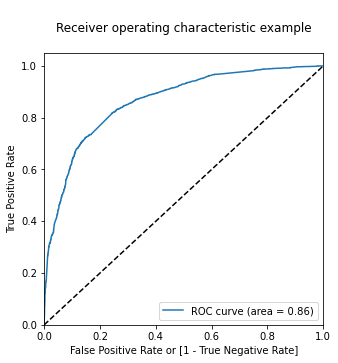

In [127]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

<div class="alert alert-block alert-info">
<h1><b> Finding Optimal Cutoff Point</b></h1>
</div>

In [128]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(10)

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3330,1,0.551745,1,1,1,1,1,1,1,0,0,0,0
6841,0,0.292156,0,1,1,1,0,0,0,0,0,0,0
2298,0,0.323305,0,1,1,1,1,0,0,0,0,0,0
3509,0,0.422991,0,1,1,1,1,1,0,0,0,0,0
2920,0,0.306348,0,1,1,1,1,0,0,0,0,0,0
6081,0,0.162317,0,1,1,0,0,0,0,0,0,0,0
4961,0,0.404176,0,1,1,1,1,1,0,0,0,0,0
6839,1,0.712278,1,1,1,1,1,1,1,1,1,0,0
4629,1,0.167274,0,1,1,0,0,0,0,0,0,0,0
2530,0,0.086803,0,1,0,0,0,0,0,0,0,0,0


In [129]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382437  1.000000  0.000000
0.1   0.1  0.528006  0.983451  0.245965
0.2   0.2  0.691139  0.909392  0.555983
0.3   0.3  0.775000  0.827886  0.742250
0.4   0.4  0.804430  0.703765  0.866769
0.5   0.5  0.800791  0.648738  0.894953
0.6   0.6  0.785759  0.573024  0.917499
0.7   0.7  0.765665  0.484485  0.939790
0.8   0.8  0.734652  0.359950  0.966692
0.9   0.9  0.712025  0.268101  0.986933


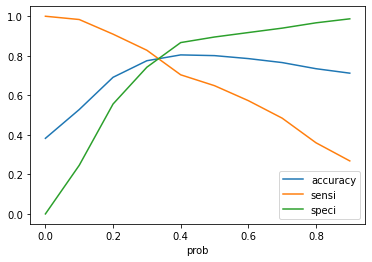

In [130]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [131]:
# Calculate predicted values at 0.3 cut-off value
Optimal_cutoff = 0.3
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > Optimal_cutoff else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3330,1,0.551745,1,1,1,1,1,1,1,0,0,0,0,1
6841,0,0.292156,0,1,1,1,0,0,0,0,0,0,0,0
2298,0,0.323305,0,1,1,1,1,0,0,0,0,0,0,1
3509,0,0.422991,0,1,1,1,1,1,0,0,0,0,0,1
2920,0,0.306348,0,1,1,1,1,0,0,0,0,0,0,1


In [132]:
# Let's check the overall accuracy.
accuracy_train = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
accuracy_train

0.775

In [133]:
# Confusion matrix for optimal cut-off
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2897, 1006],
       [ 416, 2001]], dtype=int64)

In [134]:
# Elements of confusion matrix
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [135]:
# Let's see the sensitivity of our logistic regression model
sensitivity_train=TP / float(TP+FN)
sensitivity_train

0.8278858088539511

In [136]:
# Let us calculate specificity
specificity_train=TN / float(TN+FP)
specificity_train

0.7422495516269536

In [137]:
# Calculate false postive rate - predicting conversions when leads has not converted
print(FP/ float(TN+FP))

0.2577504483730464


In [138]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6654472896574659


In [139]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8744340476909146


### Precision and Recall

In [140]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[2897, 1006],
       [ 416, 2001]], dtype=int64)

In [141]:
## Precision 
Precision_train=confusion[1,1]/(confusion[0,1]+confusion[1,1])
Precision_train

0.6654472896574659

In [142]:
## Recall
Recall_train=confusion[1,1]/(confusion[1,0]+confusion[1,1])
Recall_train

0.8278858088539511

### Precision/Recall trade-off

In [143]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

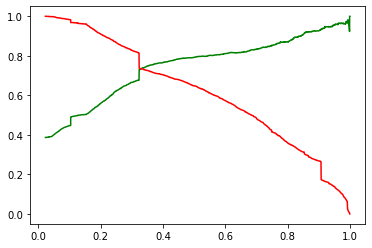

In [144]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

<div class="alert alert-block alert-info">
<h1><b> Making predictions on the test set</b></h1>
</div>

In [145]:
# Scaling the numerical variables for test data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,CurrentOccupation_Others,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,"Specialization_Banking, Investment And Insurance"
4658,0,1.880630,0,0,0,0,1,0,0
4875,0,1.147138,0,0,0,0,1,0,0
7605,0,-0.887298,0,1,0,0,0,0,0
4593,0,-0.349039,0,0,0,0,0,0,0
6402,0,1.634308,0,0,0,0,1,0,0


In [146]:
# Adding constant
X_test_sm = sm.add_constant(X_test)

In [147]:
# Predicting output
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4658    0.786233
4875    0.624014
7605    0.104000
4593    0.073682
6402    0.737911
107     0.201996
6218    0.195379
3851    0.982464
4497    0.208517
8575    0.046251
dtype: float64

In [148]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4658,0.786233
4875,0.624014
7605,0.104000
4593,0.073682
6402,0.737911


In [149]:
# Converting the output to data frame
y_test_df = pd.DataFrame(y_test)

In [150]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
4658,0,0.786233
4875,1,0.624014
7605,0,0.104000
4593,0,0.073682
6402,0,0.737911


In [151]:
# Renaming column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,Converted_Prob
4658,0,0.786233
4875,1,0.624014
7605,0,0.104000
4593,0,0.073682
6402,0,0.737911


In [152]:
# Final prediction at optimal cut-off
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > Optimal_cutoff else 0)
y_pred_final.head()

,Converted,Converted_Prob,final_predicted
4658,0,0.786233,1
4875,1,0.624014,1
7605,0,0.104000,0
4593,0,0.073682,0
6402,0,0.737911,1


In [153]:
# Let's check the overall accuracy.
accuracy_test = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
accuracy_test

0.7729789590254706

In [154]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1228,  421],
       [ 194,  866]], dtype=int64)

In [155]:
# Elements of confusion matrix
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [156]:
# Let's see the sensitivity of our logistic regression model
sensitivity_test = TP / float(TP+FN)
sensitivity_test

0.8169811320754717

In [157]:
# Let us calculate specificity
specificity_test = TN / float(TN+FP)
specificity_test

0.7446937537901759

In [158]:
## Precision 
Precision_test=confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])
Precision_test

0.6728826728826729

In [159]:
## Recall
Recall_test=confusion[1,1]/(confusion[1,0]+confusion[1,1])
Recall_test

0.8278858088539511

## FINAL METRICS

In [160]:
# Display Final Metrics for train and test data
data = {'Train':[accuracy_train, sensitivity_train, specificity_train,Precision_train,Recall_train],
        'Test':[accuracy_test, sensitivity_test, specificity_test,Precision_test,Recall_test]}
df = pd.DataFrame(data,index =['Accuracy (%)','Sensitivity (%)','Specificity (%)','Precision (%)','Recall (%)'])
round(df,4)*100

,Train,Test
Accuracy (%),77.50,77.30
Sensitivity (%),82.79,81.70
Specificity (%),74.22,74.47
Precision (%),66.54,67.29
Recall (%),82.79,82.79


## Lead Score

In [161]:
# Lead Score calculation
y_pred_final["Lead Score"] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))

In [162]:
# Final prediction with Lead Score
y_pred_final["Lead Number"]=Leads3["Lead Number"]
y_pred_final[["Lead Number","Converted","Converted_Prob","final_predicted","Lead Score"]].head()

,Lead Number,Converted,Converted_Prob,final_predicted,Lead Score
4658,615032,0,0.786233,1,79
4875,613289,1,0.624014,1,62
7605,591423,0,0.104000,0,10
4593,615737,0,0.073682,0,7
6402,600829,0,0.737911,1,74


<div class="alert alert-block alert-info">
<h1><b> Final Summary</b></h1>
</div>

## Explanation of variables-
		
- The top 3 predictors that affects conversion are-
  1. "LeadOrigin_Lead Add Form" has coefficient value of 3.9816 which indicates that a unit increase in this variable, the conversion will increase by 3.9816 units.
  2. “CurrentOccupation_Working Professional” has coefficient value of 3.9147, which indicates that a unit increase in this variable, the conversion will increase by 3.9147.
  3. "CurrentOccupation_Others" has coefficient value of 2.1206 which indicates that a unit increase in this variable variable, the conversion will increase by 2.1206 units.

- So, it is recommended to give these variables utmost importance to increase the conversion rate.

## Evaluation Metrics


**The Final Evaluation Metrics for the train Dataset**:
- The Accuracy is :    77.50%
- The Sensitivity is : 82.79%
- The Specificity is : 74.22%

**The Final Evaluation Metrics for the test Dataset**:
- The Accuracy is :    77.30%
- The Sensitivity is : 81.70%
- The Specificity is : 74.47%

**Cut-Off Value**
: 0.30